In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
import matplotlib.pyplot as plt

## MNIST Hand-written digits

Load the dataset of 28x28 grayscale images containing hand-written digits. We will attempt to classify the images into digits 0-9.

In [3]:
(training_images, training_labels) ,  (test_images, test_labels) = keras.datasets.mnist.load_data()

In [4]:
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1819 - acc: 0.9456
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0733 - acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0490 - acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0345 - acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0264 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0207 - acc: 0.9928
Epoch 7/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0171 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0154 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0122 - acc: 0.9959s - loss: 0.0122 - acc: 
Epoch 10/10
60000/60000 [========================

In [7]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0862 - acc: 0.9812


[0.08624237673461843, 0.9812]

In [8]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[7.1810564e-16 4.5347190e-14 3.6071153e-17 1.7505983e-11 9.6387585e-16
 2.9841193e-13 7.1520084e-20 1.0000000e+00 2.4940455e-15 2.8701708e-10]
7


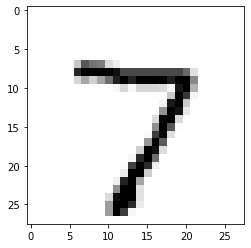

In [9]:
plt.imshow(test_images[0], cmap='Greys')

In [10]:
test_images[0].shape

(28, 28)

The first few are all correctly labeled by the model.

[7 2 1 0 4 1 4 9 5 9]


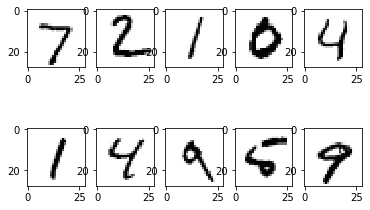

In [11]:
fig, axs = plt.subplots(ncols=5, nrows=2)

for i in range(2):
    for j in range(5):
        axs[i, j].imshow(test_images[i*5+j], cmap='Greys')

print(np.argmax(classifications[0:10], axis=1))

## Let's look at a few misclassified examples

In [12]:
pred = np.argmax(classifications, axis=1)

In [13]:
sum(pred != test_labels)

188

In [14]:
errs = [i for i, (p,y) in enumerate(zip(pred,test_labels)) if p!=y]

[9 9 1 2 7 3 4 7 0 9]
[4 2 7 4 2 5 9 3 6 4]


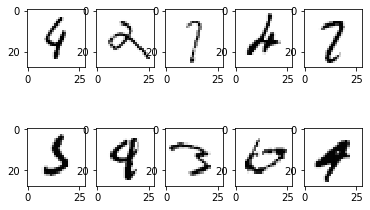

In [15]:
fig, axs = plt.subplots(ncols=5, nrows=2)

for i in range(2):
    for j in range(5):
        axs[i, j].imshow(test_images[errs[i*5+j]], cmap='Greys')

print(np.argmax(classifications[errs[0:10]], axis=1))
print(test_labels[errs[0:10]])

In [16]:
from sklearn.metrics import confusion_matrix
from itertools import product

In [17]:
cnf_matrix = confusion_matrix(test_labels, pred)

In [18]:
log_cnf_matrix = np.log(cnf_matrix, where=(cnf_matrix > 0))

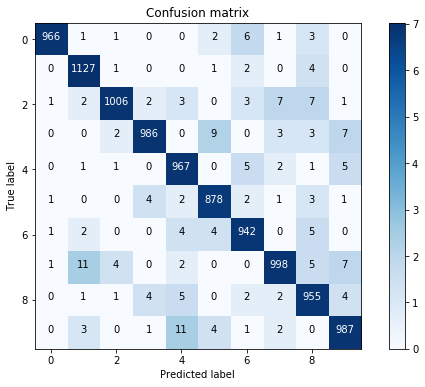

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(log_cnf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.gca().grid(False)
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel("True label")
plt.xlabel("Predicted label")

thresh = cnf_matrix.max() / 2
for i, j in product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], "d"),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

In [22]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
    training_images, training_labels, epochs=20,
)
print(history.epoch, history.history['acc'][-1])

Epoch 1/20
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1573 - acc: 0.9525
Epoch 2/20
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0547 - acc: 0.9834
Epoch 3/20
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0348 - acc: 0.9888
Epoch 4/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0234 - acc: 0.9924
Epoch 5/20
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0154 - acc: 0.9948
Epoch 6/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0107 - acc: 0.9966
Epoch 7/20
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0084 - acc: 0.9970
Epoch 8/20
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0069 - acc: 0.9979
Epoch 9/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0056 - acc: 0.9981
Epoch 10/20
60000/60000 [==============================] - 18s 2

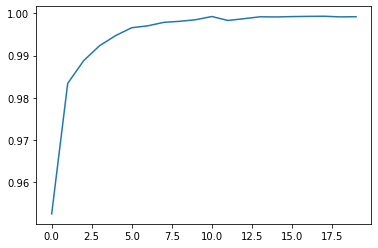

In [25]:
plt.plot(history.epoch, history.history['acc'])